In [1]:
# from google.colab import drive
import os
import cv2
import pickle
import numpy as np
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.models import load_model
import matplotlib.pyplot as plt

model=load_model('test_model_128_5_32_2.model')
lbl_bin=pickle.loads(open('supporting_file.pickle',"rb").read())


# X=[]
# lsize=128
# img_paths=sorted(list(paths.list_images("../Nat/flowers")))
# # print(img_paths)
# for img_path in img_paths:
#     X.append(cv2.resize(cv2.imread(img_path),(lsize,lsize)))
# X=np.array(X,dtype="float")/255.0
# fig=plt.figure(figsize=(20,20))
# preds=model.predict(X)
# for i in range(len(X)):
#     key=preds.argmax(axis=1)[i]
#     lbl=lbl_bin.classes_[key]
#     ax=fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
#     ax.imshow(np.squeeze(X[i]))
#     ax.set_title("{}: {:.2f}%".format(lbl,preds[i][key]*100))

C:\Users\Nat\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Nat\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Nat\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Nat\AppData\Roaming\Python\Python36\site-packages

['../Nat/flowers\\-lg!5za.jpg', '../Nat/flowers\\1.jpg', '../Nat/flowers\\1137049268_d_850.png', '../Nat/flowers\\15.jpg', '../Nat/flowers\\2.jpg', '../Nat/flowers\\3.jpg', '../Nat/flowers\\324.jpg', '../Nat/flowers\\32423.jpg', '../Nat/flowers\\333.jpg', '../Nat/flowers\\35466.jpg', '../Nat/flowers\\4.jpg', '../Nat/flowers\\432.jpg', '../Nat/flowers\\435.jpg', '../Nat/flowers\\4422.jpg', '../Nat/flowers\\44444.jpg', '../Nat/flowers\\46266.970.jpg', '../Nat/flowers\\46533.jpg', '../Nat/flowers\\5.jpg', '../Nat/flowers\\54.jpg', '../Nat/flowers\\6546.jpg', '../Nat/flowers\\6554.jpg', '../Nat/flowers\\7.png', '../Nat/flowers\\8388204690.jpg', '../Nat/flowers\\87.jpg', '../Nat/flowers\\918fc1d7fd2d1f46b8e0b2f9959520cb.jpg', '../Nat/flowers\\987.jpg', '../Nat/flowers\\buket-tyulpanov-rozovyix_650x650_d4b.png', '../Nat/flowers\\kak-zastavit-01.jpg', '../Nat/flowers\\lotos0.jpg', '../Nat/flowers\\rose_freedom.jpg', '../Nat/flowers\\unnamed (1).jpg']


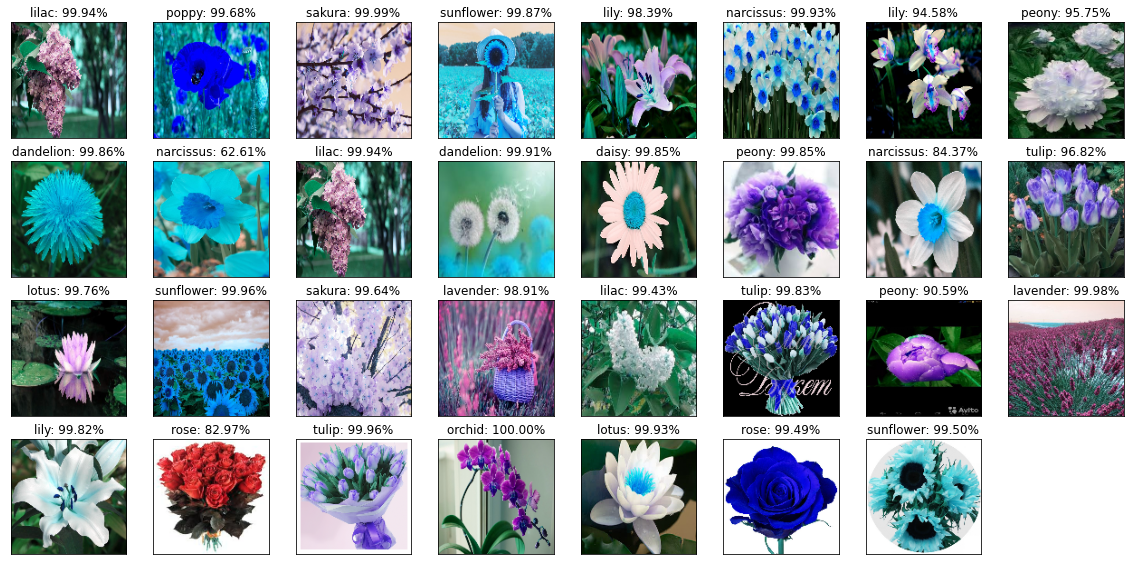

In [2]:
X=[]
lsize=128
img_paths=sorted(list(paths.list_images("../Nat/flowers")))
print(img_paths)
for img_path in img_paths:
    X.append(cv2.resize(cv2.imread(img_path),(lsize,lsize)))
X=np.array(X,dtype="float")/255.0
fig=plt.figure(figsize=(20,20))
preds=model.predict(X)
for i in range(len(X)):
    key=preds.argmax(axis=1)[i]
    lbl=lbl_bin.classes_[key]
    ax=fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(X[i]))
    ax.set_title("{}: {:.2f}%".format(lbl,preds[i][key]*100))

In [ ]:
# Визуализация результата
def visualize_pred(y_pred):
    fig = plt.figure(figsize=(16, 9))
    for i, idx in enumerate(np.random.choice(X_test.shape[0], size=16, replace=False)):
        ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(X_test[idx]))
        pred_idx = np.argmax(y_pred[idx])
        pred_idx=flower_type(pred_idx)
        true_idx = np.argmax(y_test[idx])
        true_idx=flower_type(true_idx)
        ax.set_title("{} ({})".format(pred_idx,true_idx),
                     color=("green" if pred_idx == true_idx else "red"))

visualize_pred(model.predict(X_test))

In [ ]:
#Для тестирования на паре

# data = "../palch/exam"
data = "../Nat/flowers"
size = 128,128
exam_images=[]
for file in os.listdir(os.path.join(data)):
        if file.endswith("jpg"):  #является ли файл изображением               
            img = cv2.imread(os.path.join(data,file))
            if img is not None: #чтобы все файлы прочитались
                im = cv2.resize(img,size) #приводим все картинки к одному размеру
                exam_images.append(im)
            else:
                continue
        else:
            continue
exam = np.array(exam_images)
exam = exam.astype('float32') / 255.0 
exam.shape
def visualize_pred2(y_pred):
    fig = plt.figure(figsize=(16, 9))
    for i, idx in enumerate(np.random.choice(exam.shape[0], size=13, replace=False)):
        ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(exam[idx]))
        pred_idx = np.argmax(y_pred[idx])
        pred_idx=flower_type(pred_idx)
        ax.set_title("{}".format(pred_idx),
                     color=("green"))
    
visualize_pred2(model.predict(exam))